# Convolutional Neural Networks for the Fashion MNIST dataset

The dataset includes 10 labels of different clothing types.

    Label	Description
    0	    T-shirt
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

Image details:
+ size: 28 x 28 
+ grayscale

Dataset details:
+ Training set: 60.000 images
+ Test set: 10.000 images



    
 

## The dataset

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

One of the images is shown below. The label equals 6, so it is a shirt.

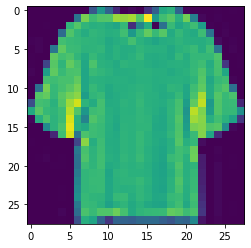

In [3]:
plt.imshow(x_train[77])

In [4]:
y_train[77]

6

Normalizing the X train and X test.

In [5]:
x_train = x_train/x_train.max()

In [6]:
x_test = x_test/x_train.max()

Reshaping the X arrays to include a 4 dimension of the single channel.

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

Converting the y_train and y_test values.

In [9]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

## Building and training the model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience = 3)

In [13]:
model.fit(x_train, y_train_categorical,
          epochs=10,
          validation_data=(x_test,y_test_categorical),
          callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 51s 852us/sample - loss: 0.4645 - accuracy: 0.8321 - val_loss: 48.4984 - val_accuracy: 0.8395
Epoch 2/10
60000/60000 [==============================] - 48s 797us/sample - loss: 0.3108 - accuracy: 0.8847 - val_loss: 42.8803 - val_accuracy: 0.8439
Epoch 3/10
60000/60000 [==============================] - 48s 799us/sample - loss: 0.2677 - accuracy: 0.8999 - val_loss: 46.9463 - val_accuracy: 0.8376
Epoch 4/10
60000/60000 [==============================] - 54s 908us/sample - loss: 0.2364 - accuracy: 0.9115 - val_loss: 48.2717 - val_accuracy: 0.8475
Epoch 5/10
60000/60000 [==============================] - 53s 891us/sample - loss: 0.2102 - accuracy: 0.9205 - val_loss: 53.4588 - val_accuracy: 0.8343


## Evaluating the model

In [14]:
predictions = model.predict_classes(x_test)

In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1000
           1       0.96      0.98      0.97      1000
           2       0.76      0.75      0.76      1000
           3       0.97      0.69      0.80      1000
           4       0.63      0.96      0.76      1000
           5       0.93      0.97      0.95      1000
           6       0.62      0.61      0.62      1000
           7       0.99      0.73      0.84      1000
           8       0.98      0.95      0.97      1000
           9       0.82      0.99      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.83     10000
weighted avg       0.85      0.83      0.83     10000

